In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

X_iris , y_iris = load_iris(return_X_y= True, as_frame= True)
iris = load_iris(as_frame= True)

In [3]:
iris_data = pd.DataFrame(X_iris, columns = iris.feature_names)
species_names = iris.target_names
iris_data['species'] = [species_names[i] for i in y_iris]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


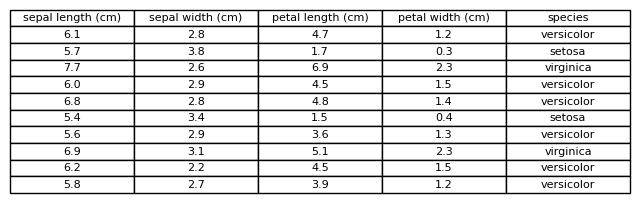

In [19]:
head_data = iris_data.sample(n=10, random_state=42)

# Configurar a plotagem
fig, ax = plt.subplots(figsize=(8, 2))  # Tamanho da imagem
ax.axis('tight')
ax.axis('off')
ax.table(cellText=head_data.values, colLabels=head_data.columns, cellLoc='center', loc='center')

# Salvar a imagem
plt.savefig('iris_data_head.png', bbox_inches='tight', dpi=300)

# Mostrar a imagem
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X_iris = stscaler.fit_transform(X_iris)
X_iris

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X_iris,y_iris, test_size= 0.2, random_state= 50)

In [7]:
from sklearn.naive_bayes import GaussianNB
gaussian_alg = GaussianNB()
model_iris_gaussian = gaussian_alg.fit(X_train,y_train)

In [8]:
y_pred = model_iris_gaussian.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.93


0.9333333333333333

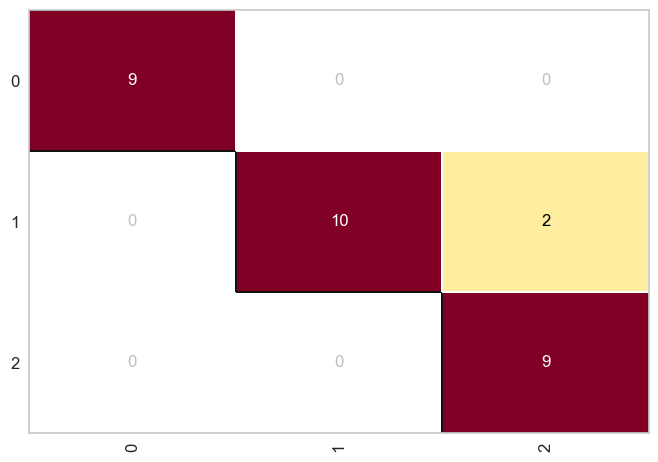

In [10]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_iris_gaussian)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
